In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy

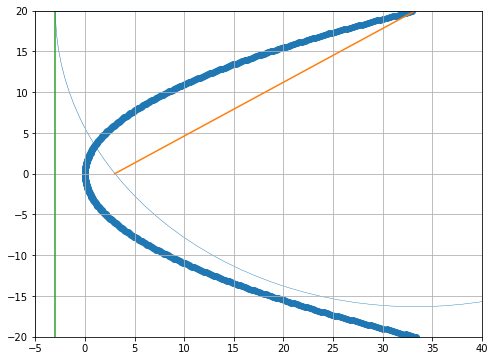

In [83]:
duration = 10.
max_x = 20
max_y = 10
fig_mpl, ax = plt.subplots(1, figsize=(8, 6), facecolor='white')

def parabola_cords(y):
    #y2 = 4ax
    a = 3
    h = 0
    x = (float((y)**2)/float(4*a))+h
    focus = a-h
    return x, focus

def get_parabola_coordinates(max_y):
    y_cords = np.arange(-max_y,max_y,.1)
    x_cords = [ float(parabola_cords(y)[0]) for y in y_cords]
    return x_cords, y_cords    

x_cords, y_cords = get_parabola_coordinates(max_x)

def draw_elementary_pattern(ax, center, radius):
    ax.set_xlim([-5,max_x*2])
    ax.set_ylim([-max_y*2,max_y*2])
    ax.scatter(x_cords, y_cords)
    ax.add_artist(mpl.patches.Wedge(center, radius, 1, 360, width=.05))
#     ax.add_artist(mpl.patches.Circle(center, .1))

def make_frame_mpl(t):
    ax.cla()
    y = (2*max_y - t/duration*2*max_y)
    x, a = parabola_cords(y)
    
    ax.grid()
    
    #Directrix to locus line
    lx = np.linspace(-a, x, 10,  endpoint=True)
    ly = np.linspace(y,y,10,endpoint=True)
    ax.plot(lx, ly)
    
    #focus to locus line
    dx = np.linspace( a, x, 10, endpoint=True )
    dy = np.linspace( 0, y, 10, endpoint=True )
    ax.plot(dx, dy)

    dirx = np.linspace(-a, -a, 10, endpoint=True)
    diry = np.linspace(-max_y*2, max_y*2, 10, endpoint=True)
    
    ax.plot(dirx, diry)
    circle_radius = np.sqrt(((x-a)**2)+(y**2))
    draw_elementary_pattern(ax,  [x,y], circle_radius)
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation = mpy.VideoClip(make_frame_mpl, duration=duration)

In [84]:
animation.ipython_display(fps=20, loop=1, autoplay=1)

t:   1%|          | 2/200 [00:00<00:11, 16.87it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [77]:
animation.write_videofile("parabola_anime.webm", fps=20)

t:   0%|          | 0/400 [00:00<?, ?it/s, now=None]

Moviepy - Building video parabola_anime.webm.
Moviepy - Writing video parabola_anime.webm



Moviepy - Done !
Moviepy - video ready parabola_anime.webm
